In [1]:
import pandas as pd
import numpy as np
import shutil
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt

In [2]:
def rle_decode(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    img = img.reshape(shape)
    return img

# RLE 인코딩 함수
def rle_encode(mask):

    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [3]:
df = pd.read_csv("../csv/segnext_60.csv")

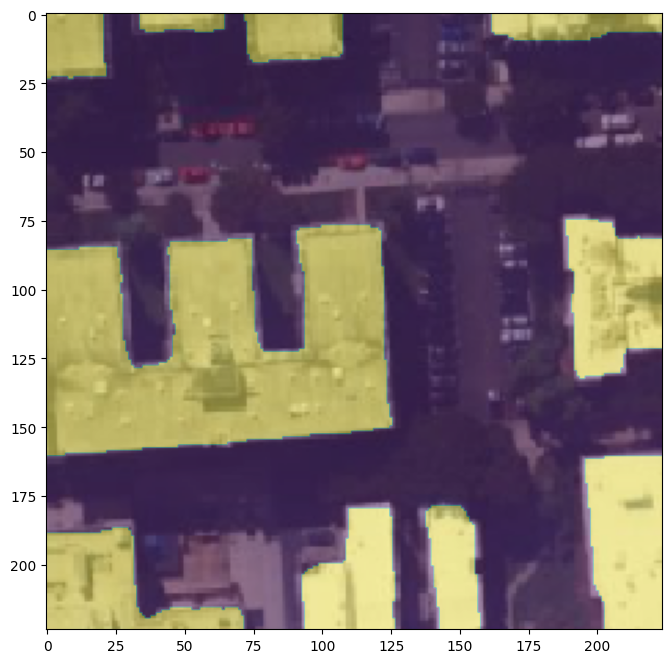

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
# 3, 4, 5, 55, 57, 64, 72, 85, 97, 117, 152, 153, 157, 58500
idx = 157
img = cv2.imread(os.path.join("data/test_img", f"{df.iloc[idx, 0]}.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape
ann_img = rle_decode(df.iloc[idx, 1], (h, w))
ax.imshow(img)
ax.imshow(ann_img, alpha=0.4, cmap="viridis")
plt.show()